In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fm_main_df = pd.read_csv('radius_time_sweep_fm_main.csv')
high_b_df =  pd.read_csv('radius_time_sweep_high_b.csv')
low_b_df = pd.read_csv('radius_time_sweep_low_b.csv')
max_slip_df = pd.read_csv('radius_time_sweep_max_slip.csv')


fm_main_df['start_time'] = pd.to_datetime(fm_main_df['start_time'])
high_b_df['start_time'] = pd.to_datetime(high_b_df['start_time'])
low_b_df['start_time'] = pd.to_datetime(low_b_df['start_time'])
max_slip_df['start_time'] = pd.to_datetime(max_slip_df['start_time'])

fm_main_df = fm_main_df.set_index(fm_main_df['start_time'])
high_b_df = fm_main_df.set_index(high_b_df['start_time'])
low_b_df = fm_main_df.set_index(low_b_df['start_time'])
max_slip_df = fm_main_df.set_index(max_slip_df['start_time'])

In [3]:
fm_main_df.head()

,radius,start_time,a_avg,b_avg,bstd_avg,n_avg,mc_avg,a_std,b_std,bstd_std,n_std,mc_std
start_time,,,,,,,,,,,,
1990-01-31,1.0,1990-01-31,5.128925,2.927801,4.701624e-16,3.555556,1.074444,6.179116,3.274485,4.888493e-16,1.943651,0.224116
1990-02-28,1.0,1990-02-28,7.003230,3.661626,3.788419e-16,3.111111,1.045556,7.701530,3.775657,2.085252e-16,1.833333,0.365072
1990-03-31,1.0,1990-03-31,6.562298,3.916279,7.959693e-16,3.888889,1.092222,6.565468,3.618088,5.899426e-16,2.472066,0.314674
1990-04-30,1.0,1990-04-30,3.178310,1.893212,1.671263e-16,4.500000,0.980000,4.127236,2.407607,1.920937e-16,1.715938,0.157198
1990-05-31,1.0,1990-05-31,5.255350,3.098245,1.071530e-15,3.777778,0.983333,6.204428,3.272212,2.684555e-15,1.641476,0.216968


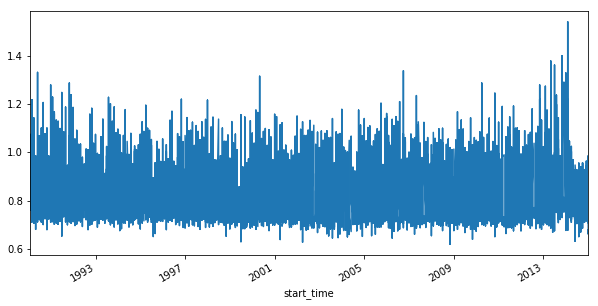

In [9]:
fm_main_df.mc_avg.plot(figsize=(10,5))

In [10]:
fm_main_df.b_avg.mean()

#### WHAT IS THE SHIFT BETWEEN BEFORE AND AFTER HINET

0.8788046961686301

In [11]:
high_b_df.b_avg.mean()

0.8788046961686301

In [21]:
from matplotlib.mlab import griddata

zi = fm_main_df.pivot(index='start_time', columns='radius', values='b_avg')
xi_label = [np.datetime64(z, 'Y') for z in zi.index]
xi = np.arange(len(xi_label))
yi = zi.columns
zi = griddata(xi, yi, fm_main_df.n_avg.values, xi, yi, interp='linear')

ValueError: x, y and z must be equal-length 1-D arrays

In [27]:
from scipy.ndimage.filters import gaussian_filter
gaussian_filter(zi, 0.7)

array([[  5.11175553e+00,   4.89037818e+00,   5.10036643e+00, ...,
                     nan,              nan,              nan],
       [  1.09605251e+01,   1.03563202e+01,   9.52017935e+00, ...,
                     nan,              nan,              nan],
       [  2.16657137e+01,   1.95662690e+01,   1.79219176e+01, ...,
                     nan,              nan,              nan],
       ..., 
       [  7.45675056e+03,   7.59570276e+03,   7.60562045e+03, ...,
          3.81220366e+02,   3.58117713e+02,   3.64455515e+02],
       [  7.61203567e+03,   7.69495885e+03,   7.70337395e+03, ...,
          4.01495120e+02,   3.93490982e+02,   4.10564954e+02],
       [  7.82006373e+03,   7.77655882e+03,   7.83504349e+03, ...,
          4.00064974e+02,   3.92819855e+02,   4.26826410e+02]])

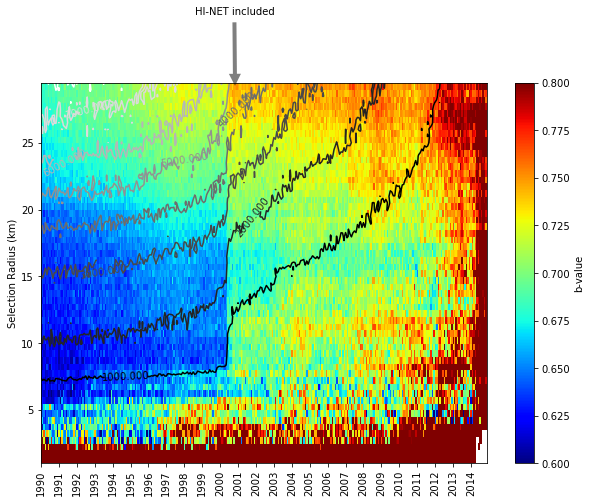

In [32]:
fig, ax = plt.subplots(figsize=(10,7))

zi = fm_main_df.pivot(index='start_time', columns='radius', values='b_avg')
xi_label = [np.datetime64(z, 'Y') for z in zi.index]
xi = np.arange(len(xi_label))
yi = zi.columns
xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi).transpose()

cbar = ax.pcolormesh(xi, yi, zi, vmin=0.6, vmax=0.8, cmap='jet')
fig.colorbar(cbar, label='b-value')


zi = fm_main_df.pivot(index='start_time', columns='radius', values='n_avg')
xi_label = [np.datetime64(z, 'Y') for z in zi.index]
xi = np.arange(len(xi_label))
yi = zi.columns
xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi).transpose()


from scipy.ndimage.filters import gaussian_filter
zi - gaussian_filter(zi, 5000)

cs = ax.contour(xi,yi,zi, 8, cmap='gray')

ax.clabel(cs, cs.levels, inline=True)


ax.set_xticks(np.arange(0,300, 12))
ax.set_xticklabels(xi_label[0::12], rotation=90)
ax.set_ylabel('Selection Radius (km)')

# ax.annotate('HINET INCLUDED', xy=(130, 30), xytext=(130,25))

ax.annotate('HI-NET included',
            xy=(130, 29), xycoords='data', color='black',
            xytext=(130./300, 1.2), textcoords='axes fraction', annotation_clip=False,
            arrowprops=dict(facecolor='black', shrink=0.05, edgecolor='None', alpha=0.5),
            horizontalalignment='center', verticalalignment='top',)


# def annotate_plot(ax, xy, s, xytext):
#     ax.annotate(s, xy=xy, xycoords='data', color='black'
# #                ,xytext=(xy[0]/300., 1.1), textcoords='axes fraction', annotation_clip=False
#                ,xytext=xytext, textcoords='axes fraction', annotation_clip=False
#                ,arrowprops=dict(facecolor='black', shrink=0.05, edgecolor='None', alpha=0.5),
#             horizontalalignment='center', verticalalignment='top', )

# eq_locations = get_node_data(node=fm_main[0:2], radius=30, data=df)
# geq_m4 = eq_locations[eq_locations.mag>4]['mag'].copy()
# [np.datetime64(g, 'M') for g in geq_m4.index]
# geq_x = [0+6, 0+12,12*2+7, 12*6+6, 12*7+4, 12*8+7, 12*9+11, 12*10+6, 12*12+5, 12*15+1, 12*17+3, 12*21+10]
# geq_label = ['M'+str(n) for n in geq_m4.values]
# geq = [x for x in zip(geq_x, geq_label)]
# n = 0
# for x, label in geq:
    
#     if n % 2 == 0:
        
#         annotate_plot(ax, xy=(x, 29), s=label, xytext=(x/300., 1.1))
        
#     else:
        
#         annotate_plot(ax, xy=(x, 29), s=label, xytext=(x/300., 1.15))

#     n+=1
    

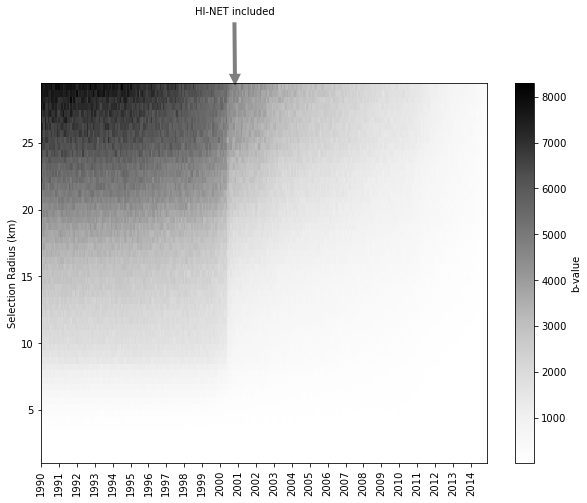

In [36]:
fig, ax = plt.subplots(figsize=(10,7))

zi = fm_main_df.pivot(index='start_time', columns='radius', values='n_avg')
xi_label = [np.datetime64(z, 'Y') for z in zi.index]
xi = np.arange(len(xi_label))
yi = zi.columns
xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi).transpose()

cbar = ax.pcolormesh(xi, yi, zi, cmap='Greys')
fig.colorbar(cbar, label='b-value')

ax.set_xticks(np.arange(0,300, 12))
ax.set_xticklabels(xi_label[0::12], rotation=90)
ax.set_ylabel('Selection Radius (km)')

# ax.annotate('HINET INCLUDED', xy=(130, 30), xytext=(130,25))

ax.annotate('HI-NET included',
            xy=(130, 29), xycoords='data', color='black',
            xytext=(130./300, 1.2), textcoords='axes fraction', annotation_clip=False,
            arrowprops=dict(facecolor='black', shrink=0.05, edgecolor='None', alpha=0.5),
            horizontalalignment='center', verticalalignment='top',)


# def annotate_plot(ax, xy, s, xytext):
#     ax.annotate(s, xy=xy, xycoords='data', color='black'
# #                ,xytext=(xy[0]/300., 1.1), textcoords='axes fraction', annotation_clip=False
#                ,xytext=xytext, textcoords='axes fraction', annotation_clip=False
#                ,arrowprops=dict(facecolor='black', shrink=0.05, edgecolor='None', alpha=0.5),
#             horizontalalignment='center', verticalalignment='top', )

# eq_locations = get_node_data(node=fm_main[0:2], radius=30, data=df)
# geq_m4 = eq_locations[eq_locations.mag>4]['mag'].copy()
# [np.datetime64(g, 'M') for g in geq_m4.index]
# geq_x = [0+6, 0+12,12*2+7, 12*6+6, 12*7+4, 12*8+7, 12*9+11, 12*10+6, 12*12+5, 12*15+1, 12*17+3, 12*21+10]
# geq_label = ['M'+str(n) for n in geq_m4.values]
# geq = [x for x in zip(geq_x, geq_label)]
# n = 0
# for x, label in geq:
    
#     if n % 2 == 0:
        
#         annotate_plot(ax, xy=(x, 29), s=label, xytext=(x/300., 1.1))
        
#     else:
        
#         annotate_plot(ax, xy=(x, 29), s=label, xytext=(x/300., 1.15))

#     n+=1
    